In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import streamlit as st
import matplotlib.pyplot as plt

In [2]:
# import pandas as pd
df = pd.read_csv("Dashboard/dataset.csv")
df

,Poster,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Description,Review Count,Review Title,Review
0,https://m.media-amazon.com/images/M/MV5BYWRkZj...,The Idea of You,2023.0,R,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...","28,744","Solène, a 40-year-old single mom, begins an un...",166,Hypocrisy as an idea,"This film, as well as the reaction to it, is a..."
1,https://m.media-amazon.com/images/M/MV5BZGI4NT...,Kingdom of the Planet of the Apes,2023.0,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...","22,248","Many years after the reign of Caesar, a young ...",183,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a..."
2,https://m.media-amazon.com/images/M/MV5BZjIyOT...,Unfrosted,2023.0,PG-13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...","18,401","In 1963 Michigan, business rivals Kellogg's an...",333,not funny,Pretty much the worst criticism you can lay on...
3,https://m.media-amazon.com/images/M/MV5BMjA5Zj...,The Fall Guy,2023.0,PG-13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...","38,953",A down-and-out stuntman must find the missing ...,384,Everything you needed and more!,Just got out of the Austin premier at SXSW and...
4,https://m.media-amazon.com/images/M/MV5BNTk1MT...,Challengers,2023.0,R,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...","32,517","Tashi, a former tennis prodigy turned coach, t...",194,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,https://m.media-amazon.com/images/M/MV5BMzg5MW...,The Greatest Show on Earth,2020.0,U,152.0,"Drama, Family, Romance",6.5,76.0,Cecil B. DeMille,"James Stewart, Charlton Heston, Betty Hutton, ...","16,078","The dramatic lives of trapeze artists, a clown...",128,"Hey, doesn't anyone remember Last Emperor?",It constantly amazes me that people carp that ...
9996,https://m.media-amazon.com/images/M/MV5BYzA0ZG...,Berserk: Ougon Jidai-hen I - Haou no Tamago,2020.0,NaN,76.0,"Animation, Action, Adventure",7.5,NaN,Toshiyuki Kubooka,"Hiroaki Iwanaga, Carrie Keranen, Takahiro Saku...","14,300",A lone sellsword named Guts gets recruited int...,12,Masterfully directed climatic epic saga,Few stories can capture your mind and soul in ...
9997,https://m.media-amazon.com/images/M/MV5BM2U1Mj...,Is-slottet,2020.0,NaN,78.0,"Mystery, Drama",6.5,NaN,Per Blom,"Line Storesund, Hilde Nyeggen Martinsen, Meret...",740,A couple of twelve-year-old Norwegian girls st...,4,Beautiful Film,"This film might not be to everyone's taste, it..."
9998,https://m.media-amazon.com/images/M/MV5BMTAwOD...,Loving Pablo,2020.0,A,123.0,"Biography, Crime, Drama",6.4,42.0,Fernando León de Aranoa,"Javier Bardem, Penélope Cruz, Peter Sarsgaard,...","22,447",A journalist strikes up a romantic relationshi...,84,That film should be in Spanish,Why anyone (the director?) made Spanish actors...


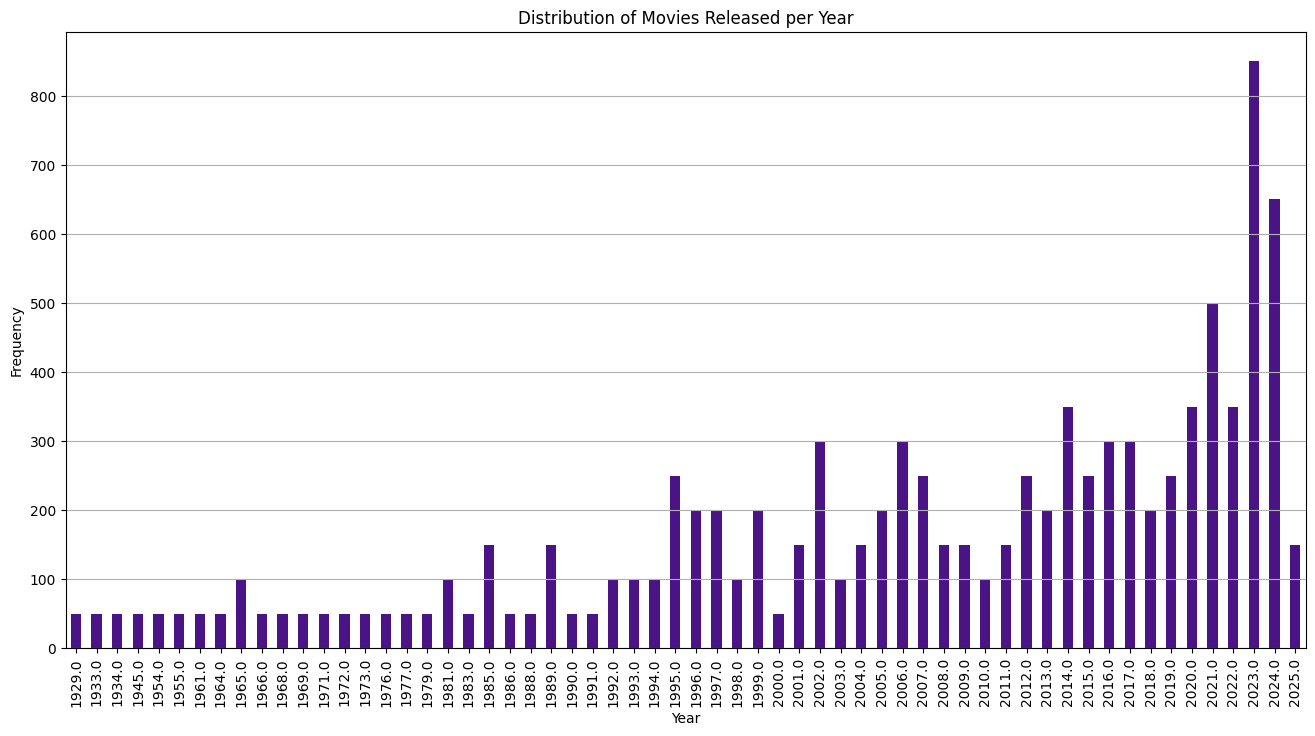

In [3]:
years = df["Year"].unique()
years.sort()

colors = sns.color_palette("Purples", len(years))

color_mapping = {year: colors[i] for i, year in enumerate(years)}

bar_colors = df["Year"].map(color_mapping)

Freq = df["Year"].value_counts().sort_index().plot(
    kind="bar", 
    title="Distribution of Movies Released per Year", 
    figsize=(16, 8), 
    color=bar_colors
)

Freq.set_xlabel("Year")
Freq.set_ylabel("Frequency")
plt.grid(True, axis='y')
plt.show()

C:\Users\shiva\AppData\Local\Temp\ipykernel_20660\1852269202.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Distribution_Rating.index, y=Distribution_Rating.values, palette='viridis')


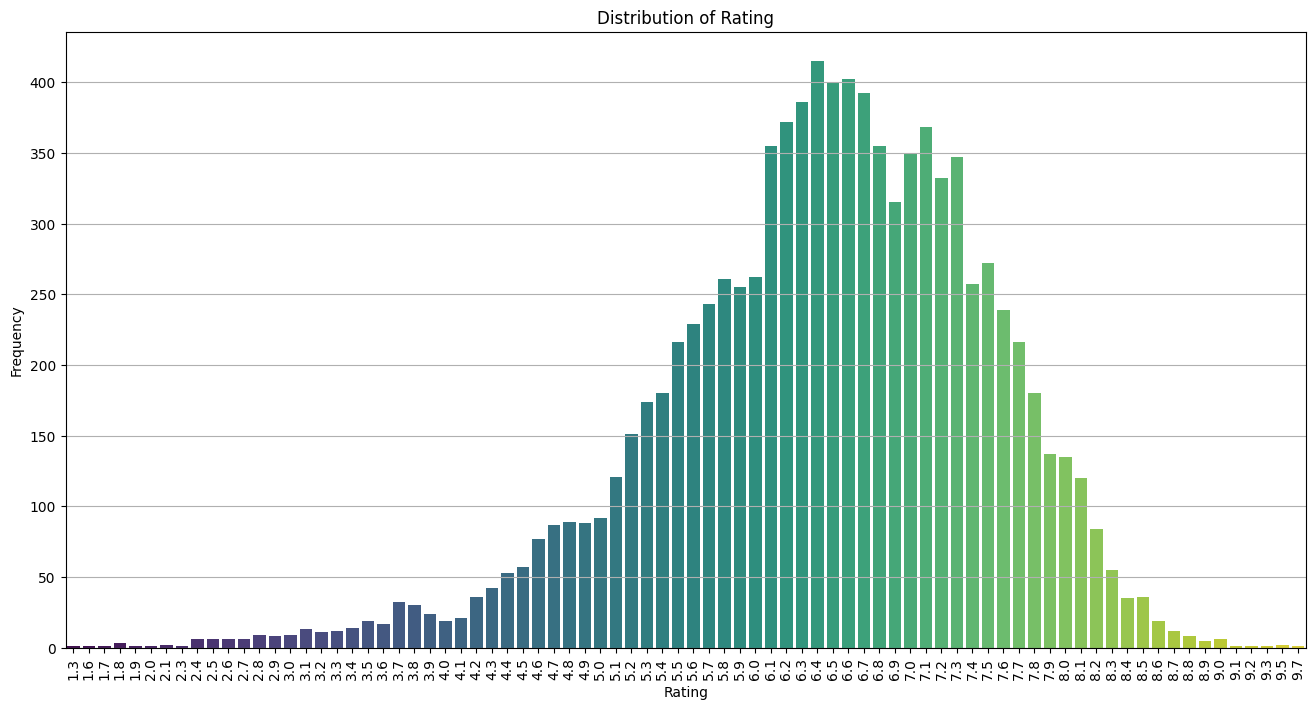

In [4]:
Distribution_Rating = df['Rating'].value_counts().sort_index()

plt.figure(figsize=(16, 8))
sns.barplot(x=Distribution_Rating.index, y=Distribution_Rating.values, palette='viridis')
plt.title("Distribution of Rating")
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(True, axis='y')
plt.show()

top20 year by average rating

C:\Users\shiva\AppData\Local\Temp\ipykernel_20660\222229488.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean1.index, y=mean1["Rating"], ax=axes, palette=palette)
C:\Users\shiva\AppData\Local\Temp\ipykernel_20660\222229488.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(mean1.index, rotation=45, ha='right', fontsize=12)


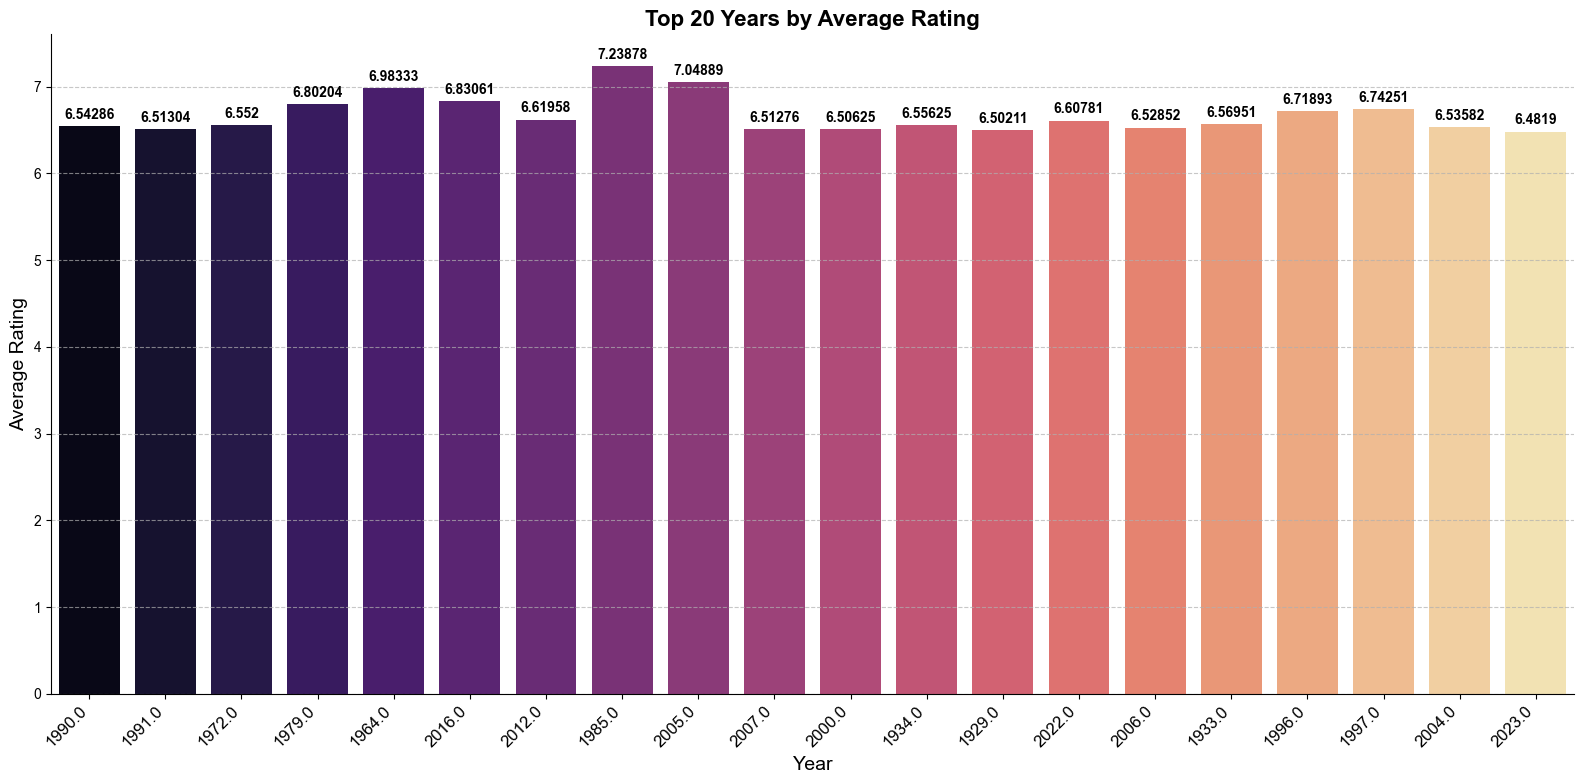

In [5]:
fig, axes = plt.subplots(figsize=(16, 8))
grouped = df.groupby("Year")
mean = pd.DataFrame(grouped["Rating"].mean())
mean1 = mean.sort_values("Rating", ascending=False).head(20)

palette = sns.color_palette("magma", len(mean1))

sns.barplot(x=mean1.index, y=mean1["Rating"], ax=axes, palette=palette)

for container in axes.containers:
    axes.bar_label(container, label_type="edge", padding=3, fontsize=10, color='black', weight='bold')

axes.set_xticklabels(mean1.index, rotation=45, ha='right', fontsize=12)

axes.set_xlabel('Year', fontsize=14)
axes.set_ylabel('Average Rating', fontsize=14)
axes.set_title('Top 20 Years by Average Rating', fontsize=16, weight='bold')

axes.grid(True, axis='y', linestyle='--', alpha=0.7)

sns.despine()

sns.set(style="darkgrid")

plt.tight_layout()
plt.show()

C:\Users\shiva\AppData\Local\Temp\ipykernel_20660\633789425.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean1["Rating"], y=mean1.index, ax=axes, palette=palette)


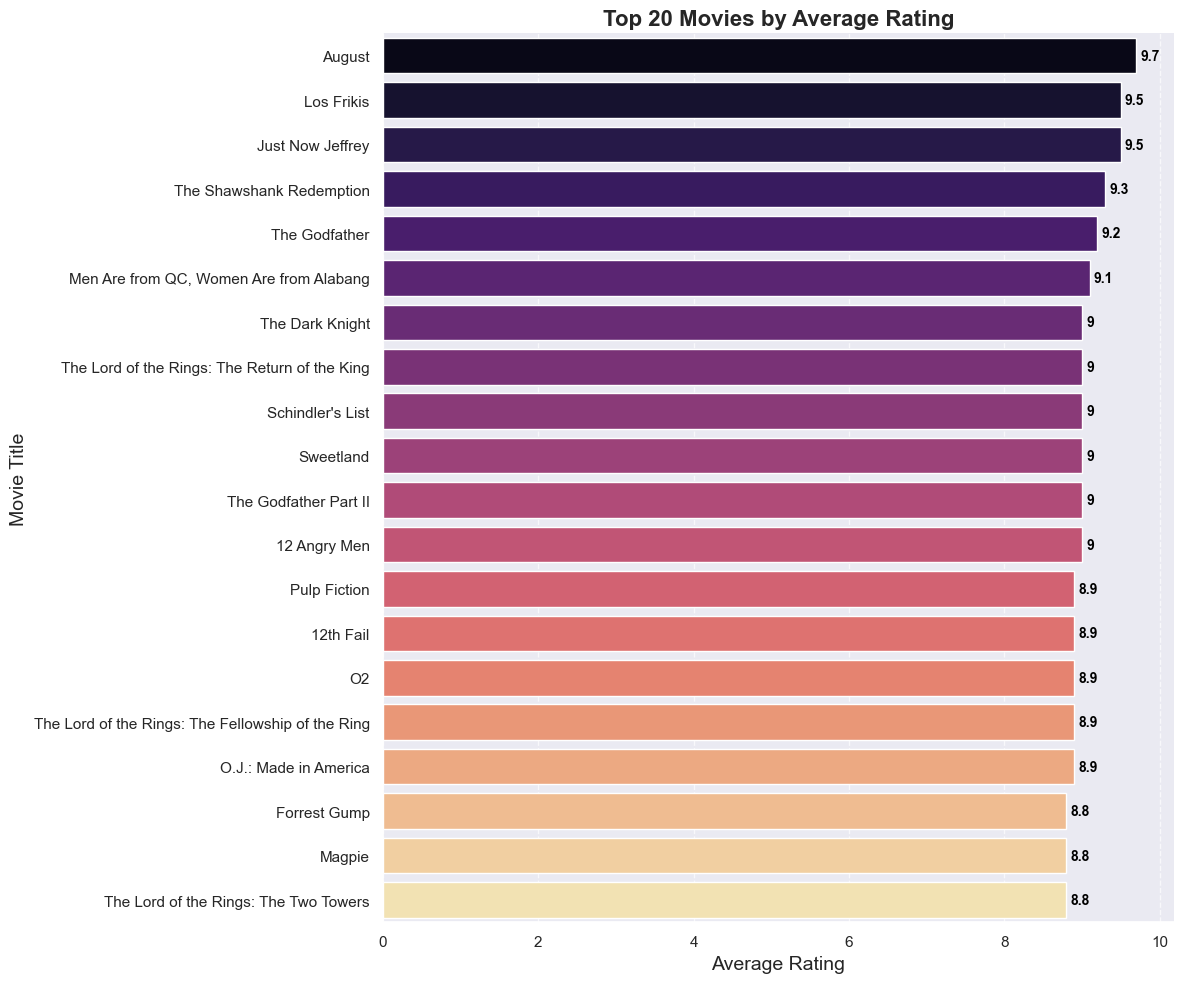

In [6]:
sns.set(style="darkgrid")

fig, axes = plt.subplots(figsize=(12, 10))
grouped = df.groupby("Title")
mean = pd.DataFrame(grouped["Rating"].mean())
mean1 = mean.sort_values("Rating", ascending=False).head(20)

palette = sns.color_palette("magma", len(mean1))

sns.barplot(x=mean1["Rating"], y=mean1.index, ax=axes, palette=palette)

for container in axes.containers:
    axes.bar_label(container, label_type="edge", padding=3, fontsize=10, color='black', weight='bold')


axes.set_xlabel('Average Rating', fontsize=14)
axes.set_ylabel('Movie Title', fontsize=14)
axes.set_title('Top 20 Movies by Average Rating', fontsize=16, weight='bold')

axes.grid(True, axis='x', linestyle='--', alpha=0.7)

sns.despine()

plt.tight_layout()
plt.show()

C:\Users\shiva\AppData\Local\Temp\ipykernel_20660\3757719747.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean1["Rating"], y=mean1.index, ax=axes, palette=palette)


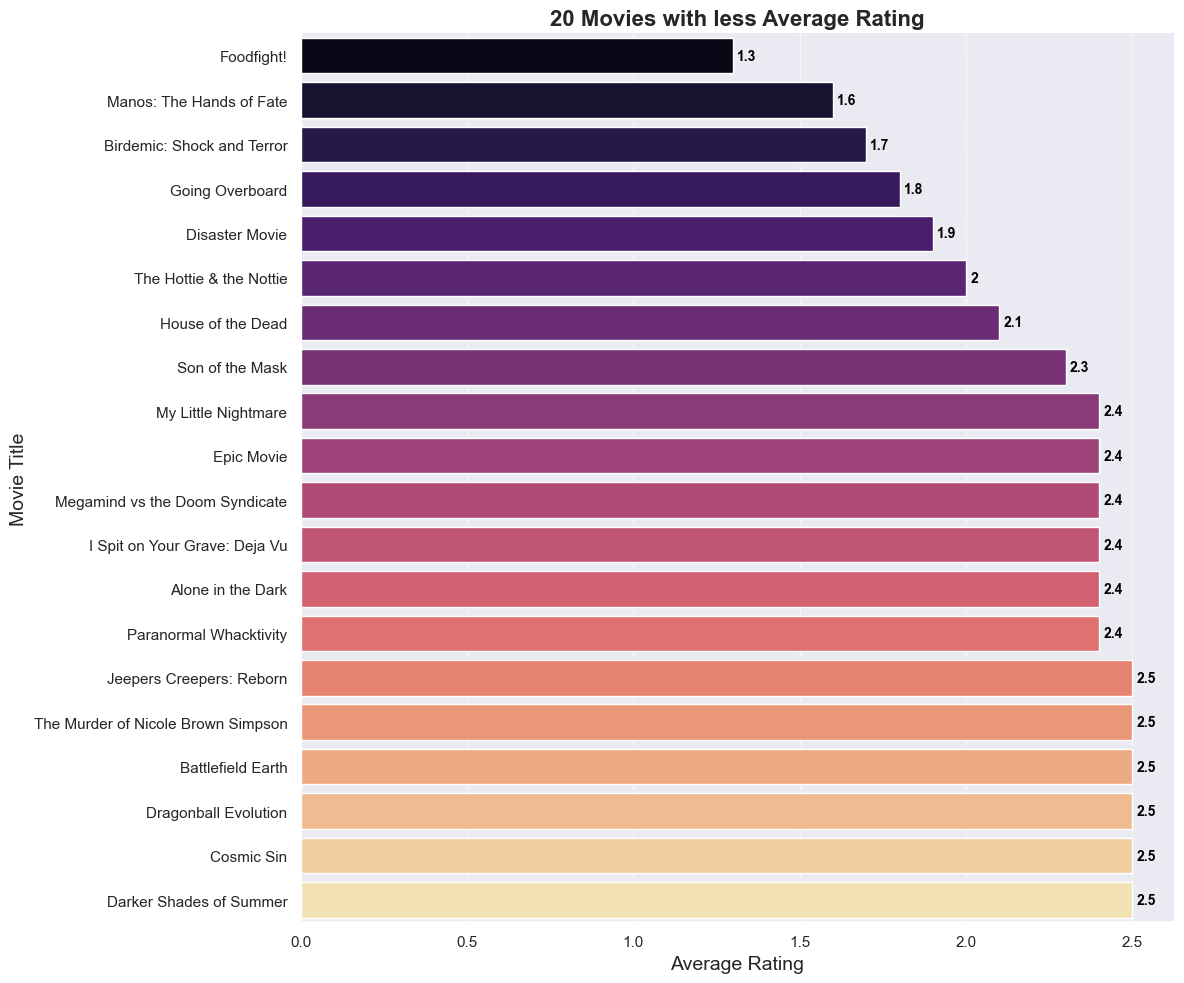

In [7]:
sns.set(style="darkgrid")

fig, axes = plt.subplots(figsize=(12, 10))
grouped = df.groupby("Title")
mean = pd.DataFrame(grouped["Rating"].mean())
mean1 = mean.sort_values("Rating", ascending=True).head(20)

palette = sns.color_palette("magma", len(mean1))


sns.barplot(x=mean1["Rating"], y=mean1.index, ax=axes, palette=palette)

for container in axes.containers:
    axes.bar_label(container, label_type="edge", padding=3, fontsize=10, color='black', weight='bold')


axes.set_xlabel('Average Rating', fontsize=14)
axes.set_ylabel('Movie Title', fontsize=14)
axes.set_title('20 Movies with less Average Rating', fontsize=16, weight='bold')

axes.grid(True, axis='x', linestyle='--', alpha=0.7)

sns.despine()

plt.tight_layout()
plt.show()

TypeError: agg function failed [how->mean,dtype->object]

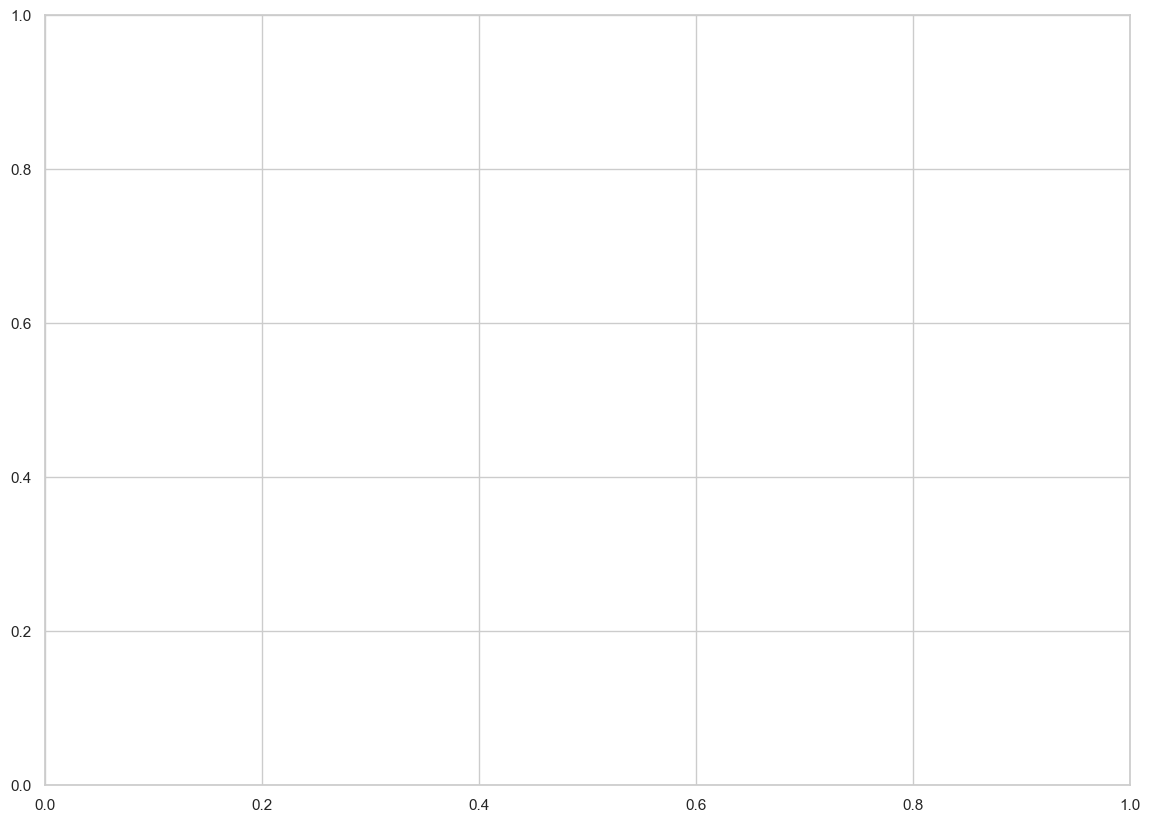

In [8]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(figsize=(14, 10))
grouped = df.groupby("Title")
mean = pd.DataFrame(grouped["Votes"].mean())
mean1 = mean.sort_values("Votes", ascending=False).head(20)

palette = sns.color_palette("magma", len(mean1))

sns.barplot(x=mean1["Votes"], y=mean1.index, ax=axes, palette=palette)

for container in axes.containers:
    axes.bar_label(container, label_type="edge", padding=3, fontsize=10, color='black', weight='bold')

axes.set_xlabel('Average Votes', fontsize=14, weight='bold')
axes.set_ylabel('Movie Title', fontsize=14, weight='bold')
axes.set_title('Top 20 Movies by Average Votes', fontsize=18, weight='bold')

axes.grid(True, axis='x', linestyle='--', alpha=0.7)

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

TypeError: agg function failed [how->mean,dtype->object]

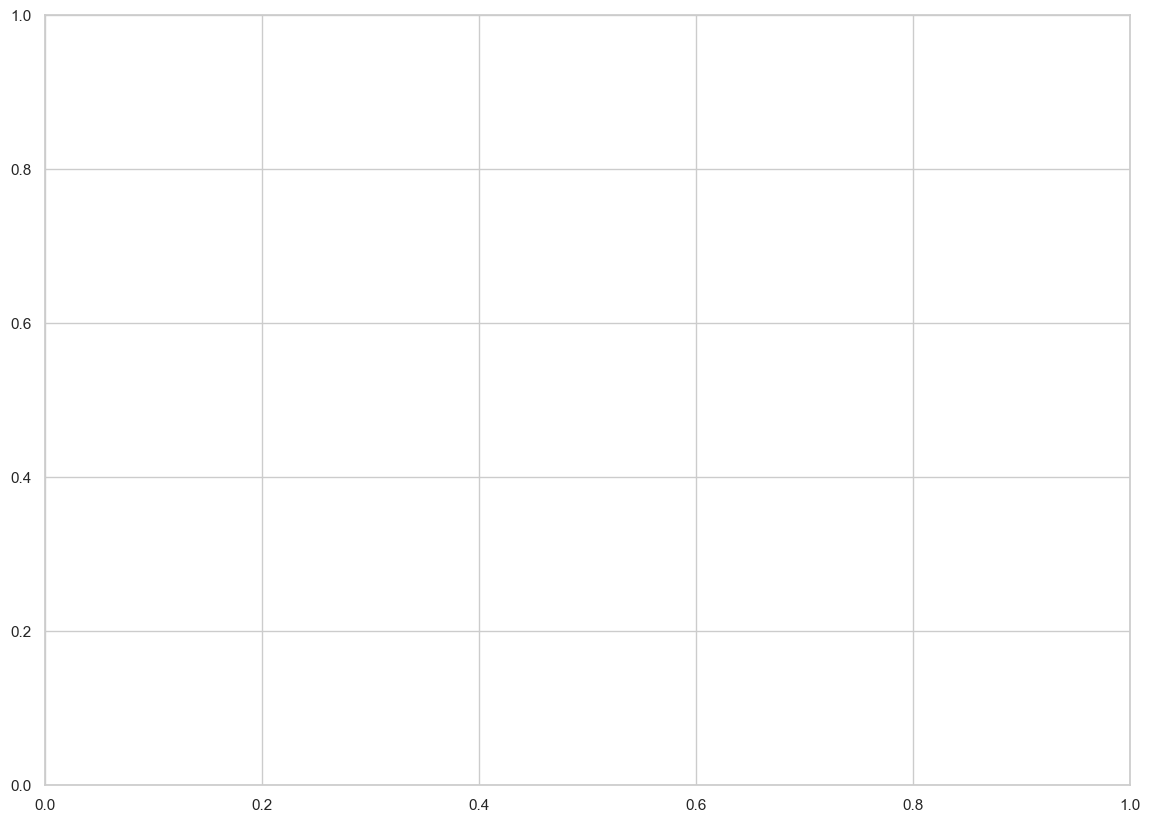

In [ ]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(figsize=(14, 10))
grouped = df.groupby("Title")
mean = pd.DataFrame(grouped["Votes"].mean())
mean1 = mean.sort_values("Votes", ascending=True).head(20)

palette = sns.color_palette("magma", len(mean1))

sns.barplot(x=mean1["Votes"], y=mean1.index, ax=axes, palette=palette)

for container in axes.containers:
    axes.bar_label(container, label_type="edge", padding=3, fontsize=10, color='black', weight='bold')

axes.set_xlabel('Average Votes', fontsize=14, weight='bold')
axes.set_ylabel('Movie Title', fontsize=14, weight='bold')
axes.set_title('20 Movies less Voted', fontsize=18, weight='bold')

axes.grid(True, axis='x', linestyle='--', alpha=0.7)

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

C:\Users\shiva\AppData\Local\Temp\ipykernel_2772\2364481974.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Review Count", y="Title", data=temp, ax=axes, palette=palette)
C:\Users\shiva\AppData\Local\Temp\ipykernel_2772\2364481974.py:10: UserWarning: The palette list has more values (20) than needed (5), which may not be intended.
  sns.barplot(x="Review Count", y="Title", data=temp, ax=axes, palette=palette)


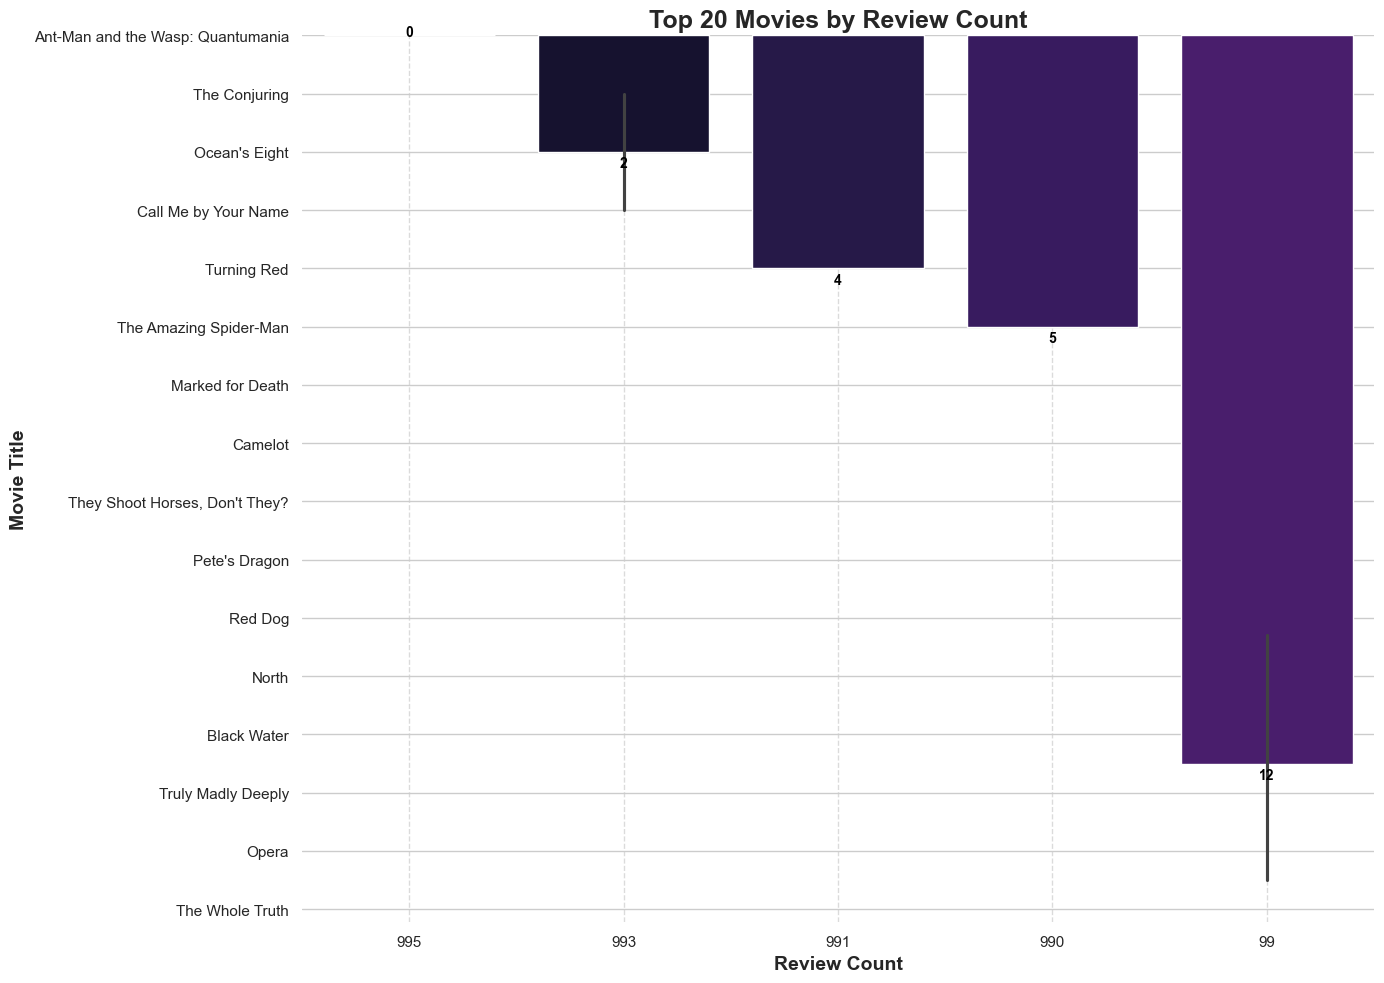

In [ ]:
temp = df[["Title", "Review Count"]].copy()
temp = temp.sort_values("Review Count", ascending=False).head(20)

sns.set(style="whitegrid")

fig, axes = plt.subplots(figsize=(14, 10))

palette = sns.color_palette("magma", len(temp))

sns.barplot(x="Review Count", y="Title", data=temp, ax=axes, palette=palette)

for container in axes.containers:
    axes.bar_label(container, fmt="%.0f", label_type="edge", padding=3, fontsize=10, color='black', weight='bold')

axes.set_xlabel('Review Count', fontsize=14, weight='bold')
axes.set_ylabel('Movie Title', fontsize=14, weight='bold')
axes.set_title('Top 20 Movies by Review Count', fontsize=18, weight='bold')

axes.grid(True, axis='x', linestyle='--', alpha=0.7)

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

C:\Users\shiva\AppData\Local\Temp\ipykernel_2772\4112136253.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette=palette)


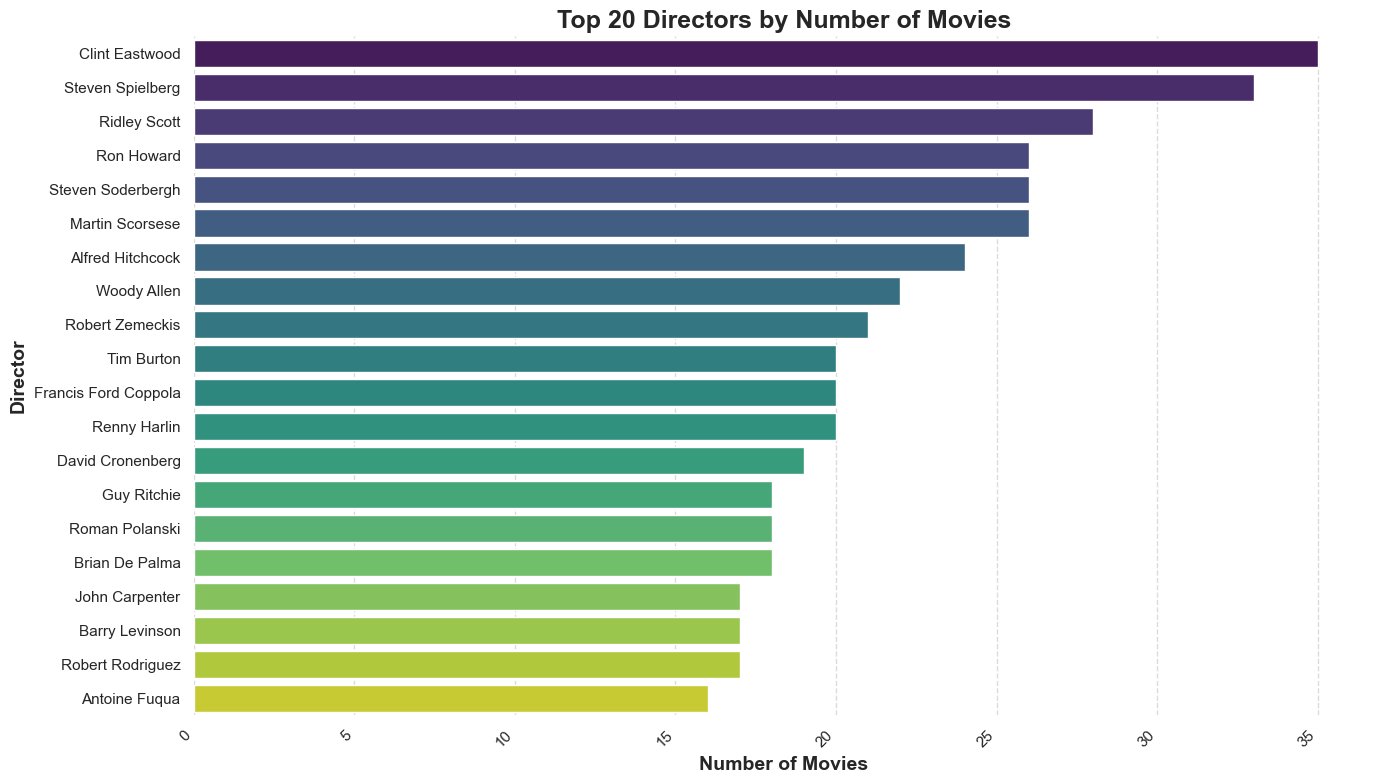

Director
Clint Eastwood          35
Steven Spielberg        33
Ridley Scott            28
Ron Howard              26
Steven Soderbergh       26
Martin Scorsese         26
Alfred Hitchcock        24
Woody Allen             22
Robert Zemeckis         21
Tim Burton              20
Francis Ford Coppola    20
Renny Harlin            20
David Cronenberg        19
Guy Ritchie             18
Roman Polanski          18
Brian De Palma          18
John Carpenter          17
Barry Levinson          17
Robert Rodriguez        17
Antoine Fuqua           16
Name: count, dtype: int64

In [ ]:
top_directors = df['Director'].value_counts().head(20)

sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))

palette = sns.color_palette("viridis", len(top_directors))

sns.barplot(x=top_directors.values, y=top_directors.index, palette=palette)

plt.title('Top 20 Directors by Number of Movies', fontsize=18, weight='bold')
plt.xlabel('Number of Movies', fontsize=14, weight='bold')
plt.ylabel('Director', fontsize=14, weight='bold')

plt.grid(True, axis='x', linestyle='--', alpha=0.7)

plt.xticks(rotation=45, ha='right')

sns.despine(left=True, bottom=True)

plt.tight_layout()

plt.show()

top_directors

C:\Users\shiva\AppData\Local\Temp\ipykernel_2772\2230364059.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean1["Rating"], y=mean1.index, ax=axes, palette=palette)


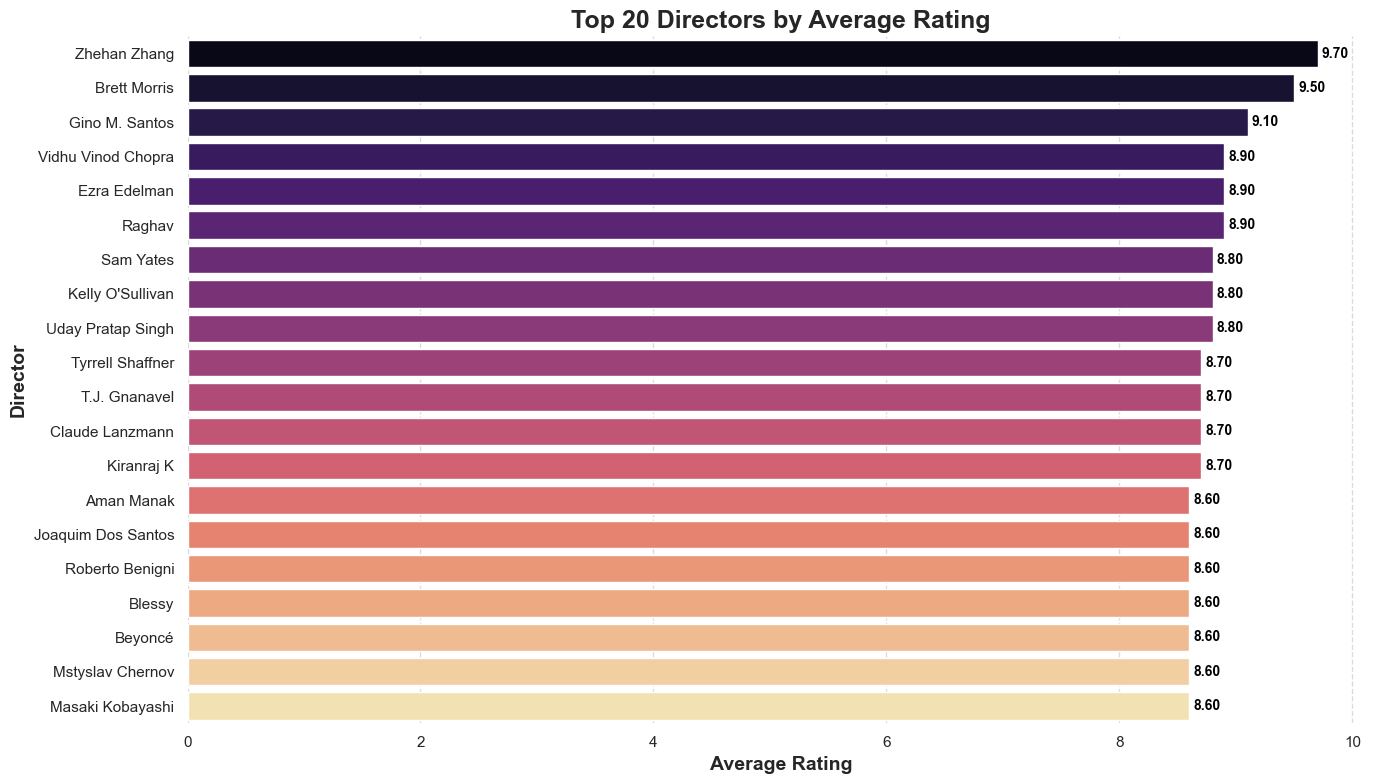

In [ ]:
fig, axes = plt.subplots(figsize=(14, 8))
grouped = df.groupby("Director")
mean = pd.DataFrame(grouped["Rating"].mean())
mean1 = mean.sort_values("Rating", ascending=False).head(20)

sns.set(style="whitegrid")

palette = sns.color_palette("magma", len(mean1))

sns.barplot(x=mean1["Rating"], y=mean1.index, ax=axes, palette=palette)

for container in axes.containers:
    axes.bar_label(container, fmt="%.2f", label_type="edge", padding=3, fontsize=10, color='black', weight='bold')

axes.set_xlabel('Average Rating', fontsize=14, weight='bold')
axes.set_ylabel('Director', fontsize=14, weight='bold')
axes.set_title('Top 20 Directors by Average Rating', fontsize=18, weight='bold')

axes.grid(True, axis='x', linestyle='--', alpha=0.7)

sns.despine(left=True, bottom=True)

plt.tight_layout()

plt.show()

C:\Users\shiva\AppData\Local\Temp\ipykernel_2772\3813773590.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=actor_counts.values, y=actor_counts.index, palette=palette)


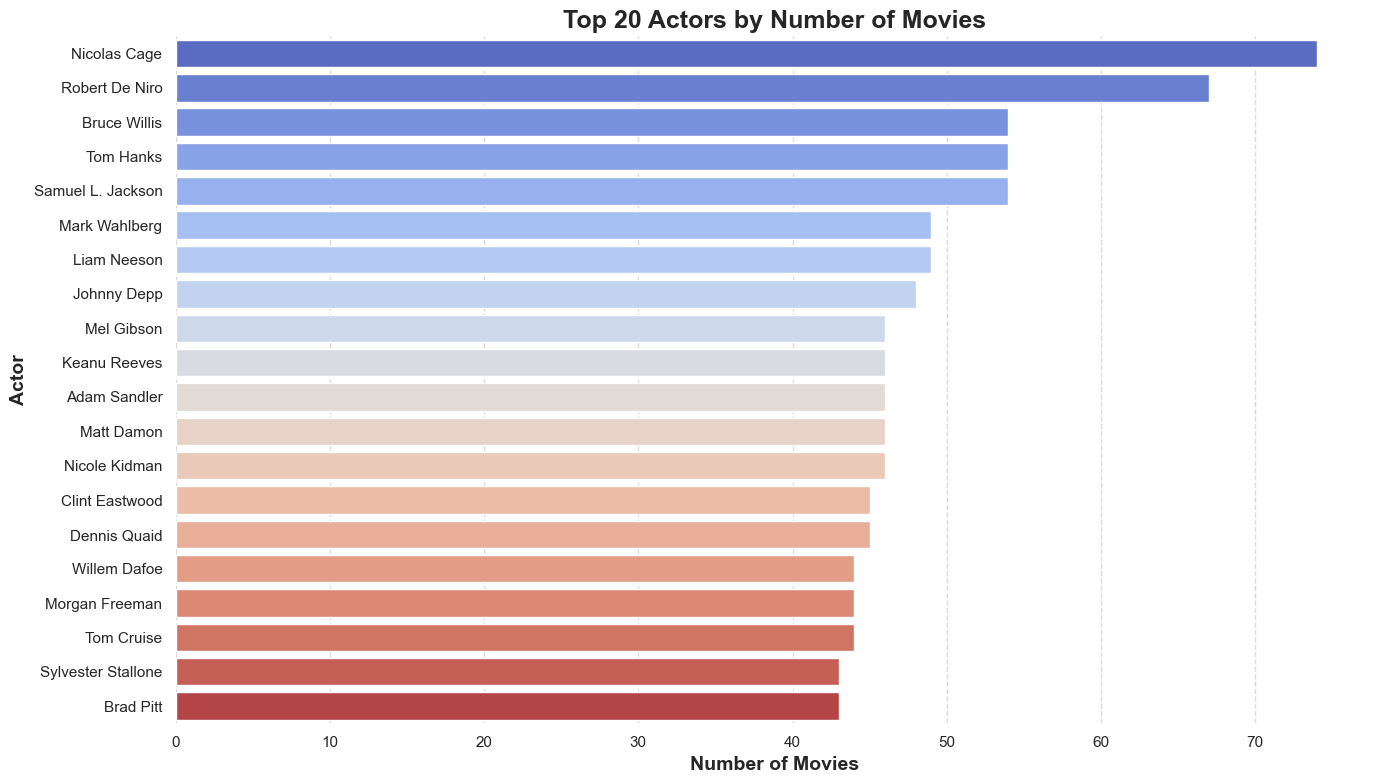

Nicolas Cage          74
Robert De Niro        67
Bruce Willis          54
Tom Hanks             54
Samuel L. Jackson     54
Mark Wahlberg         49
Liam Neeson           49
Johnny Depp           48
Mel Gibson            46
Keanu Reeves          46
Adam Sandler          46
Matt Damon            46
Nicole Kidman         46
Clint Eastwood        45
Dennis Quaid          45
Willem Dafoe          44
Morgan Freeman        44
Tom Cruise            44
Sylvester Stallone    43
Brad Pitt             43
Name: count, dtype: int64

In [ ]:
cast_series = df['Cast'].dropna().apply(lambda x: x.split(', '))
actors = [actor for sublist in cast_series for actor in sublist]
actor_counts = pd.Series(actors).value_counts().head(20)
  
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))

palette = sns.color_palette("coolwarm", len(actor_counts))

sns.barplot(x=actor_counts.values, y=actor_counts.index, palette=palette)

plt.title('Top 20 Actors by Number of Movies', fontsize=18, weight='bold')
plt.xlabel('Number of Movies', fontsize=14, weight='bold')
plt.ylabel('Actor', fontsize=14, weight='bold')

plt.grid(True, axis='x', linestyle='--', alpha=0.7)

sns.despine(left=True, bottom=True)

plt.tight_layout()

plt.show()

actor_counts

C:\Users\shiva\AppData\Local\Temp\ipykernel_2772\2209419471.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Certificate', order=df['Certificate'].value_counts().index, palette=palette)
C:\Users\shiva\AppData\Local\Temp\ipykernel_2772\2209419471.py:7: UserWarning: The palette list has more values (31) than needed (30), which may not be intended.
  sns.countplot(data=df, x='Certificate', order=df['Certificate'].value_counts().index, palette=palette)


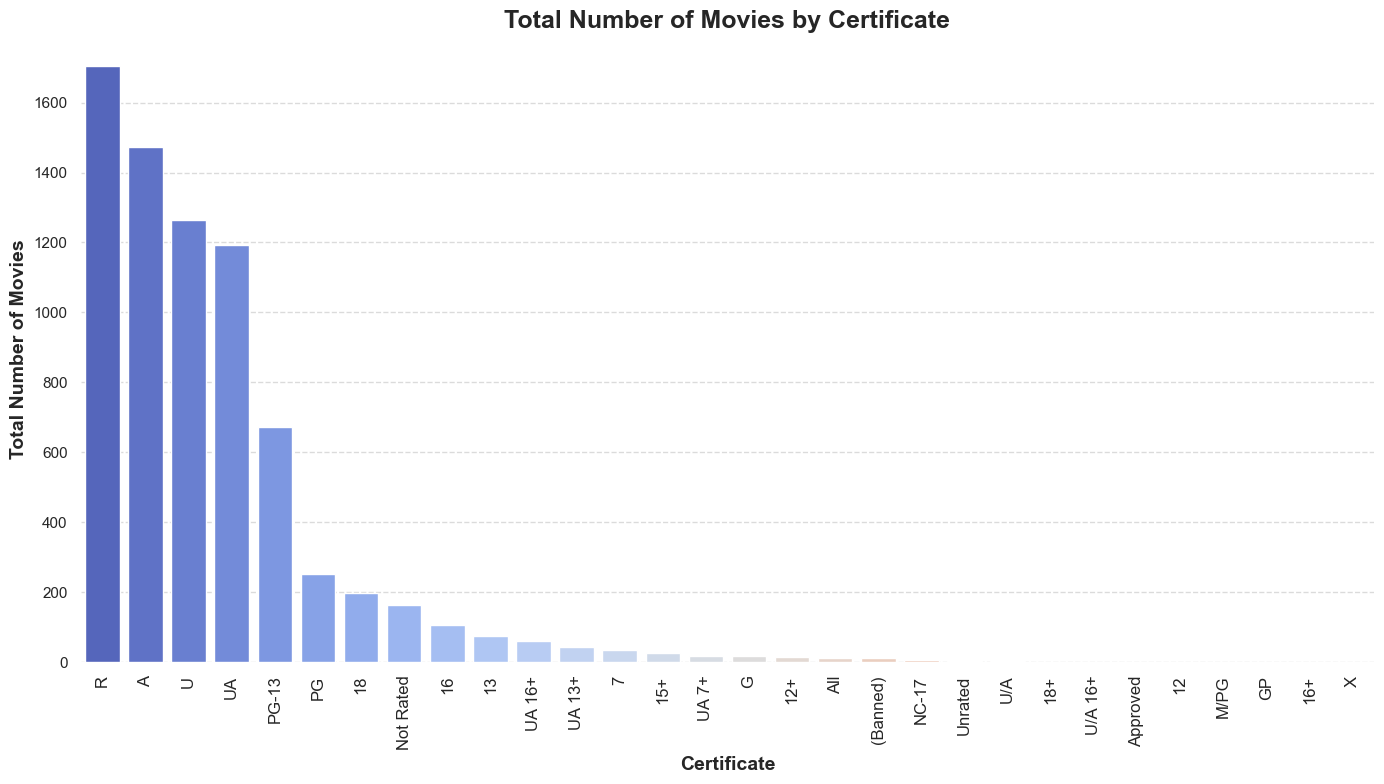

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))

palette = sns.color_palette("coolwarm", len(df['Certificate'].unique()))

sns.countplot(data=df, x='Certificate', order=df['Certificate'].value_counts().index, palette=palette)

plt.title('Total Number of Movies by Certificate', fontsize=18, weight='bold')
plt.xlabel('Certificate', fontsize=14, weight='bold')
plt.ylabel('Total Number of Movies', fontsize=14, weight='bold')

plt.xticks(rotation=90, fontsize=12)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

sns.despine(left=True, bottom=True)

plt.tight_layout()

plt.show()

In [ ]:
fig, axes = plt.subplots(figsize=(14, 8))
grouped = df.groupby("Director")
mean = pd.DataFrame(grouped["Votes"].mean())
mean1 = mean.sort_values("Votes", ascending=True).head(20)

sns.set(style="whitegrid")

palette = sns.color_palette("magma", len(mean1))

sns.barplot(x=mean1["Votes"], y=mean1.index, ax=axes, palette=palette)

for container in axes.containers:
    axes.bar_label(container, fmt="%.0f", label_type="edge", padding=3, fontsize=10, color='black', weight='bold')

axes.set_xlabel('Average Votes', fontsize=14, weight='bold')
axes.set_ylabel('Director', fontsize=14, weight='bold')
axes.set_title('Top 20 Directors less voted', fontsize=18, weight='bold')

axes.grid(True, axis='x', linestyle='', alpha=0.7)

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

In [ ]:
fig, axes = plt.subplots(figsize=(14, 8))
grouped = df.groupby("Director")
mean = pd.DataFrame(grouped["Votes"].mean())
mean1 = mean.sort_values("Votes", ascending=False).head(20)

sns.set(style="whitegrid")

palette = sns.color_palette("magma", len(mean1))

sns.barplot(x=mean1["Votes"], y=mean1.index, ax=axes, palette=palette)

for container in axes.containers:
    axes.bar_label(container, fmt="%.0f", label_type="edge", padding=3, fontsize=10, color='black', weight='bold')

axes.set_xlabel('Average Votes', fontsize=14, weight='bold')
axes.set_ylabel('Director', fontsize=14, weight='bold')
axes.set_title('Top 20 Directors by Average Votes', fontsize=18, weight='bold')

axes.grid(True, axis='x', linestyle='', alpha=0.7)

sns.despine(left=True, bottom=True)

plt.tight_layout()

plt.show()

NameError: name 'plt' is not defined

C:\Users\shiva\AppData\Local\Temp\ipykernel_2772\371883470.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean1["Rating"], y=mean1.index, ax=axes, palette=palette)


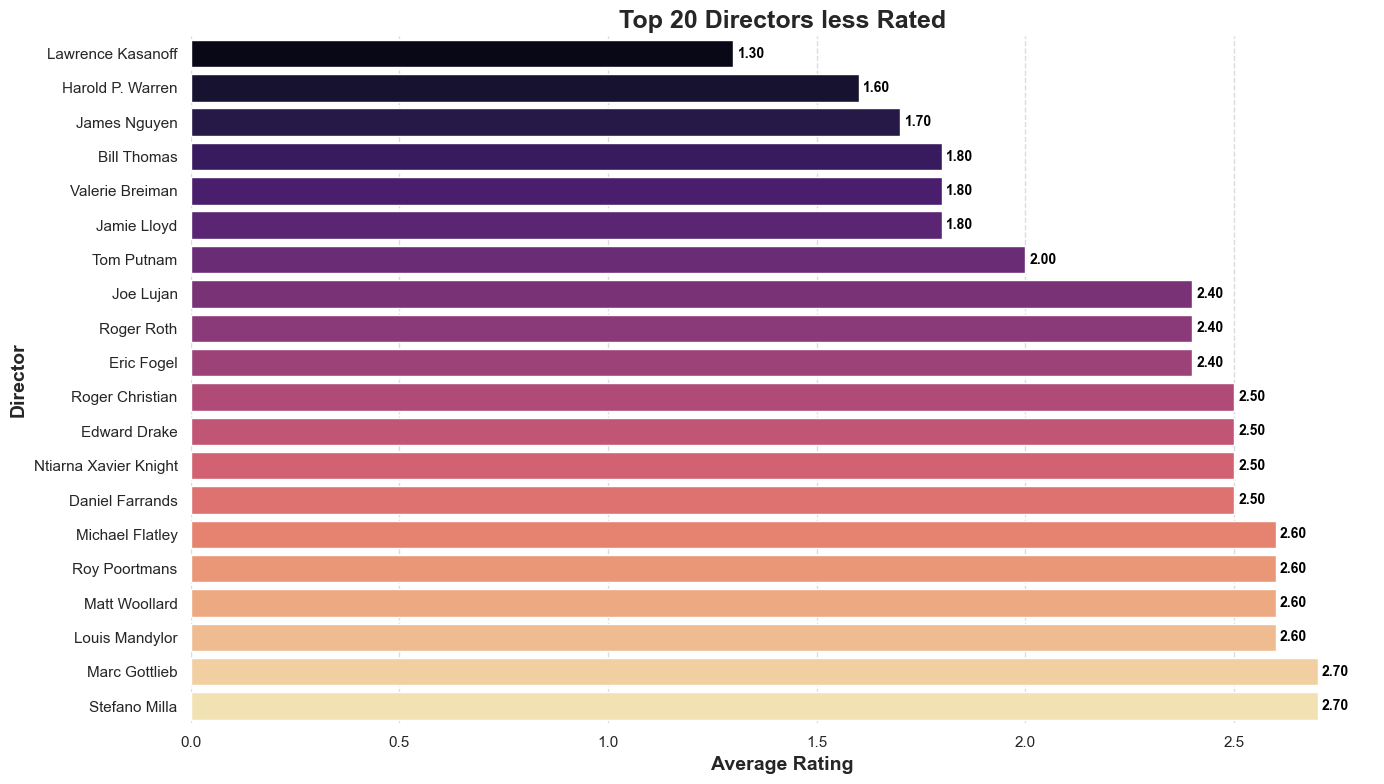

In [ ]:
fig, axes = plt.subplots(figsize=(14, 8))
grouped = df.groupby("Director")
mean = pd.DataFrame(grouped["Rating"].mean())
mean1 = mean.sort_values("Rating", ascending=True).head(20)

sns.set(style="whitegrid")

palette = sns.color_palette("magma", len(mean1))

sns.barplot(x=mean1["Rating"], y=mean1.index, ax=axes, palette=palette)

for container in axes.containers:
    axes.bar_label(container, fmt="%.2f", label_type="edge", padding=3, fontsize=10, color='black', weight='bold')

axes.set_xlabel('Average Rating', fontsize=14, weight='bold')
axes.set_ylabel('Director', fontsize=14, weight='bold')
axes.set_title('Top 20 Directors less Rated', fontsize=18, weight='bold')

axes.grid(True, axis='x', linestyle='--', alpha=0.7)

sns.despine(left=True, bottom=True)

plt.tight_layout()

plt.show()

C:\Users\shiva\AppData\Local\Temp\ipykernel_2772\2230364059.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean1["Rating"], y=mean1.index, ax=axes, palette=palette)


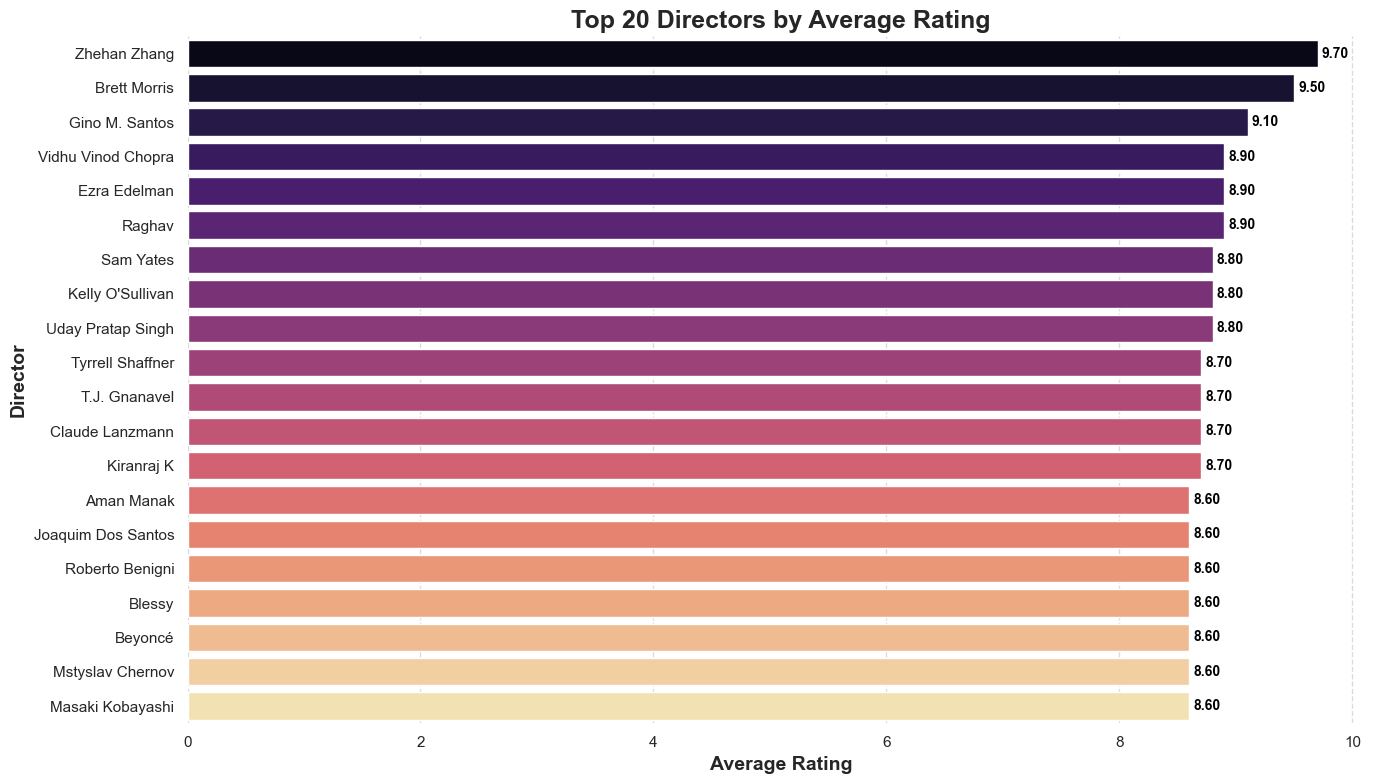

In [ ]:
fig, axes = plt.subplots(figsize=(14, 8))
grouped = df.groupby("Director")
mean = pd.DataFrame(grouped["Rating"].mean())
mean1 = mean.sort_values("Rating", ascending=False).head(20)

sns.set(style="whitegrid")

palette = sns.color_palette("magma", len(mean1))

sns.barplot(x=mean1["Rating"], y=mean1.index, ax=axes, palette=palette)

for container in axes.containers:
    axes.bar_label(container, fmt="%.2f", label_type="edge", padding=3, fontsize=10, color='black', weight='bold')

axes.set_xlabel('Average Rating', fontsize=14, weight='bold')
axes.set_ylabel('Director', fontsize=14, weight='bold')
axes.set_title('Top 20 Directors by Average Rating', fontsize=18, weight='bold')

axes.grid(True, axis='x', linestyle='--', alpha=0.7)

sns.despine(left=True, bottom=True)

plt.tight_layout()

plt.show()